In [1]:
## Prerequisite Library
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
!pip install missingno
!pip install pendulum
import missingno as msno
import pendulum as pdl


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
df = pd.read_csv("/Users/kratikaaggarwal/Downloads/aviation_data_merged.csv")
df.head()

,date,hour,runway,weather,dep_eff_comp,arr_eff_comp,total_eff_comp,dep_facility_rep,arr_facility_rep,total_facility_rep,...,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
0,1/1/22,0.0,22L | 22R,IMC,5,10,15,0,0,0,...,0.0,66.67,110.50,12.00,0.00,109.5,3.22,4.22,2.89,14.22
1,1/1/22,1.0,22L | 22R,IMC,2,3,5,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,1/1/22,2.0,22L | 22R,IMC,0,0,0,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
3,1/1/22,3.0,22L | 22R,IMC,1,1,2,0,0,0,...,0.0,60.00,0.00,0.00,0.00,0.0,1.00,0.98,3.60,43.80
4,1/1/22,4.0,22L | 22R,IMC,0,2,2,0,0,0,...,100.0,66.67,0.25,14.25,2.15,1.0,15.83,2.20,18.67,38.50


In [3]:
df.head()

,date,hour,runway,weather,dep_eff_comp,arr_eff_comp,total_eff_comp,dep_facility_rep,arr_facility_rep,total_facility_rep,...,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
0,1/1/22,0.0,22L | 22R,IMC,5,10,15,0,0,0,...,0.0,66.67,110.50,12.00,0.00,109.5,3.22,4.22,2.89,14.22
1,1/1/22,1.0,22L | 22R,IMC,2,3,5,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
2,1/1/22,2.0,22L | 22R,IMC,0,0,0,0,0,0,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
3,1/1/22,3.0,22L | 22R,IMC,1,1,2,0,0,0,...,0.0,60.00,0.00,0.00,0.00,0.0,1.00,0.98,3.60,43.80
4,1/1/22,4.0,22L | 22R,IMC,0,2,2,0,0,0,...,100.0,66.67,0.25,14.25,2.15,1.0,15.83,2.20,18.67,38.50


In [4]:
df.describe()

,hour,avg_cap,cap_utilized_percent,dep_eff,arr_eff,saer,per_ontime_gate_dep,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
count,5832.00000,5833.000000,5833.000000,5833.000000,5833.000000,5833.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000,5797.000000
mean,11.50000,76.660895,58.146403,91.287833,95.594646,93.156983,61.381930,48.568106,65.664989,20.494901,20.086721,8.944042,28.082914,3.337699,6.216476,5.597406,20.955903
std,6.92278,8.437916,29.754681,12.450909,10.136614,9.815878,30.441751,31.592384,27.231230,24.576788,10.963796,9.070444,29.757648,5.510457,5.923113,8.085037,25.191452
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.75000,78.000000,32.500000,87.730000,95.650000,90.910000,44.830000,21.740000,52.940000,4.970000,15.970000,3.610000,9.000000,1.000000,2.560000,1.470000,6.180000
50%,11.50000,80.000000,67.500000,95.220000,100.000000,96.150000,69.230000,51.160000,73.530000,13.890000,19.660000,7.200000,21.000000,2.400000,4.770000,3.530000,13.600000
75%,17.25000,80.000000,81.250000,100.000000,100.000000,100.000000,84.620000,74.070000,85.000000,26.980000,23.970000,11.450000,36.720000,3.920000,8.120000,6.870000,26.440000
max,23.00000,94.000000,140.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,237.000000,103.000000,90.400000,277.400000,153.040000,86.680000,157.270000,354.550000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  5832 non-null   object 
 1   hour                  5832 non-null   float64
 2   runway                5741 non-null   object 
 3   weather               5832 non-null   object 
 4   dep_eff_comp          5833 non-null   object 
 5   arr_eff_comp          5833 non-null   object 
 6   total_eff_comp        5833 non-null   object 
 7   dep_facility_rep      5833 non-null   object 
 8   arr_facility_rep      5833 non-null   object 
 9   total_facility_rep    5833 non-null   object 
 10  dep_demand_units      5833 non-null   object 
 11  arr_demand_units      5833 non-null   object 
 12  total_demand_units    5833 non-null   object 
 13  eff_aar               5833 non-null   object 
 14  adr                   5833 non-null   object 
 15  cap_aar              

### Data Manipulation : Changing format of date

In [6]:
# Avoiding null rows 
df = df.iloc[:-5,:]

date_col = df['date']+" "+df['hour'].astype(int).astype(str)

## Parsing date_col to pdl.datetime format
for i in range(len(df)):
  temp = date_col[i]
  temp = pdl.from_format(temp, 'MM/DD/YY HH')
  df['date'][i] = temp

# Reindexing the df with newly converted datetime format column
df.index = df['date']

# Droping extra column
df = df.drop(['date', 'hour'], axis=1)

/var/folders/j9/7zd3spx53398jkp125stdc7w0000gn/T/ipykernel_11923/563911194.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'][i] = temp


### Sanity Check 1 : To see if any rows are duplicate

In [7]:
counter = 0
for this_column in df.columns:
    if (df[this_column].nunique()==1):
        print(this_column)
        counter = 1
if(counter != 1):
    print('There are no such columns having the same value for all the rows.')

There are no such columns having the same value for all the rows.


### Data Check 1: Unique values and count

In [8]:
#function to number of unique values and its count for all columns in a data frame
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))
        print("\n")

In [9]:
uniq_per_col(df,5)

====  runway has 15 unique entries ====
22L | 22R        2776
4R | 4L          1782
29 | 22R          272
11, 22L | 22R     219
22R | 22R         196
Name: runway, dtype: int64


====  weather has 2 unique entries ====
VMC    4849
IMC     983
Name: weather, dtype: int64


====  dep_eff_comp has 52 unique entries ====
0     306
33    202
31    201
1     196
30    196
Name: dep_eff_comp, dtype: int64


====  arr_eff_comp has 50 unique entries ====
27    242
30    224
29    214
31    197
28    196
Name: arr_eff_comp, dtype: int64


====  total_eff_comp has 86 unique entries ====
63    155
65    150
66    146
60    143
62    141
Name: total_eff_comp, dtype: int64


====  dep_facility_rep has 52 unique entries ====
0     1744
31     211
33     208
28     192
27     189
Name: dep_facility_rep, dtype: int64


====  arr_facility_rep has 49 unique entries ====
0     1741
27     226
30     222
29     208
28     206
Name: arr_facility_rep, dtype: int64


====  total_facility_rep has 83 unique ent

### Data Check 2 : Checking for Null Values

In [10]:
df.isnull().sum()/len(df)*100

runway                  1.560357
weather                 0.000000
dep_eff_comp            0.000000
arr_eff_comp            0.000000
total_eff_comp          0.000000
dep_facility_rep        0.000000
arr_facility_rep        0.000000
total_facility_rep      0.000000
dep_demand_units        0.000000
arr_demand_units        0.000000
total_demand_units      0.000000
eff_aar                 0.000000
adr                     0.000000
cap_aar                 0.000000
adr_plus_cap_aar        0.000000
avg_cap                 0.000000
cap_utilized_percent    0.000000
dep_eff                 0.000000
arr_eff                 0.000000
saer                    0.000000
sched_dep               0.600137
sched_arr               0.600137
dep_metric_comp         0.600137
arr_metric_comp         0.600137
per_ontime_gate_dep     0.600137
per_ontime_arp_dep      0.600137
per_ontime_gate_arr     0.600137
avg_gate_dep_delay      0.600137
avg_taxi_out_time       0.600137
avg_taxi_out_delay      0.600137
avg_arp_de

From the above observation it is clear that, we have a good variety of data. We have minimal null values in the data. Hence we can conclude that we have good data. But we still can work on the data types of object type columns.

### Data Manipulation 2 : Handling Null Values

In [11]:
## Handling Null Values
df=df[:-36]

### Data Manipulation 3 : Updating Datatypes of columns

In [12]:
#update the datatype of the above columns
df['runway'] = df['runway'].astype('category')
df['weather'] = df['weather'].astype('category')

df[['dep_eff_comp','arr_eff_comp',
    'total_eff_comp','dep_facility_rep',
    'arr_facility_rep','total_facility_rep',
    'dep_demand_units','arr_demand_units',
    'total_demand_units','eff_aar',
    'adr','cap_aar',
    'adr_plus_cap_aar',
    'sched_dep','sched_arr',
    'dep_metric_comp','arr_metric_comp']]= df[['dep_eff_comp','arr_eff_comp',
                                               'total_eff_comp','dep_facility_rep',
                                               'arr_facility_rep','total_facility_rep',
                                               'dep_demand_units','arr_demand_units',
                                               'total_demand_units','eff_aar','adr',
                                               'cap_aar','adr_plus_cap_aar','sched_dep',
                                               'sched_arr','dep_metric_comp','arr_metric_comp']].apply(pd.to_numeric)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5796 entries, 2022-01-01 00:00:00+00:00 to 2022-08-30 11:00:00+00:00
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   runway                5705 non-null   category
 1   weather               5796 non-null   category
 2   dep_eff_comp          5796 non-null   int64   
 3   arr_eff_comp          5796 non-null   int64   
 4   total_eff_comp        5796 non-null   int64   
 5   dep_facility_rep      5796 non-null   int64   
 6   arr_facility_rep      5796 non-null   int64   
 7   total_facility_rep    5796 non-null   int64   
 8   dep_demand_units      5796 non-null   int64   
 9   arr_demand_units      5796 non-null   int64   
 10  total_demand_units    5796 non-null   int64   
 11  eff_aar               5796 non-null   int64   
 12  adr                   5796 non-null   int64   
 13  cap_aar               5796 non-null   int64   
 14  adr_plus

Text(0.5, 1.0, 'Departure computed, facility, demand')

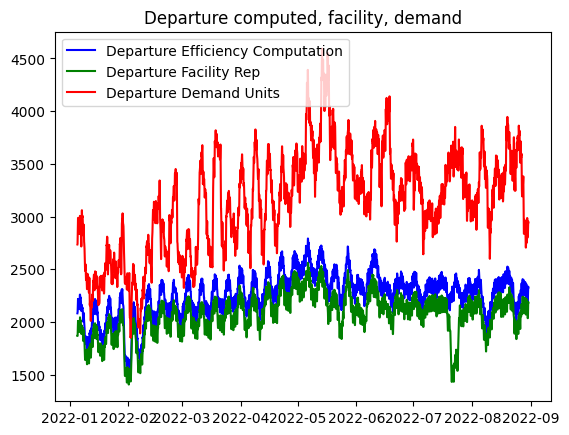

In [14]:
plt.plot(df['dep_eff_comp'].rolling(100).sum(), color='b') 
plt.plot(df['dep_facility_rep'].rolling(100).sum(), color='g')
plt.plot(df['dep_demand_units'].rolling(100).sum(), color='r')
plt.legend(['Departure Efficiency Computation', 'Departure Facility Rep', 'Departure Demand Units'])
plt.title('Departure computed, facility, demand')

Text(0.5, 1.0, 'Arrival computed, facility, demand')

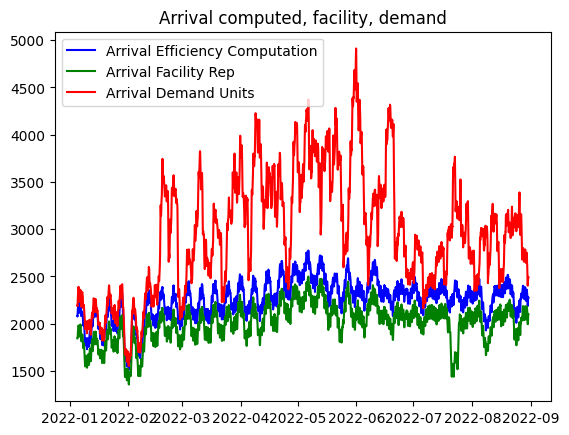

In [15]:
plt.plot(df['arr_eff_comp'].rolling(100).sum(), color='b') 
plt.plot(df['arr_facility_rep'].rolling(100).sum(), color='g')
plt.plot(df['arr_demand_units'].rolling(100).sum(), color='r')
plt.legend(['Arrival Efficiency Computation', 'Arrival Facility Rep', 'Arrival Demand Units'])
plt.title('Arrival computed, facility, demand')

Here, we can clearly see that our demand is more than the capacity, estimation.

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

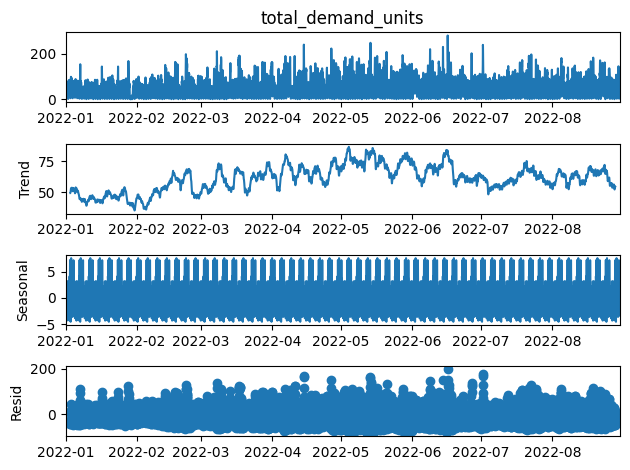

In [17]:
decomposition = seasonal_decompose(df['total_demand_units'], model='additive', period=100)
decomposition.plot()
plt.show()

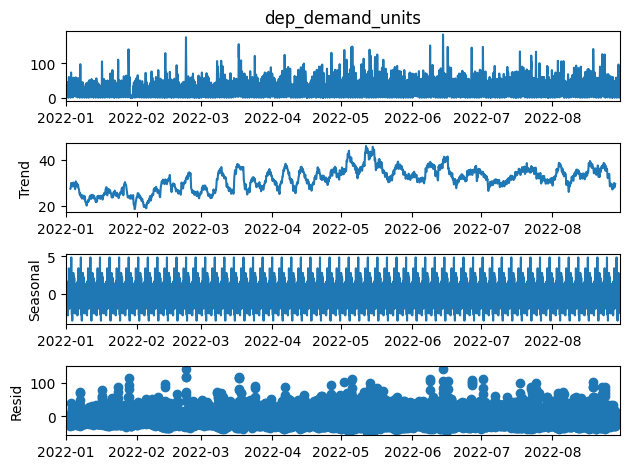

In [18]:
decomposition = seasonal_decompose(df['dep_demand_units'], model='additive', period=100)
decomposition.plot()
plt.show()

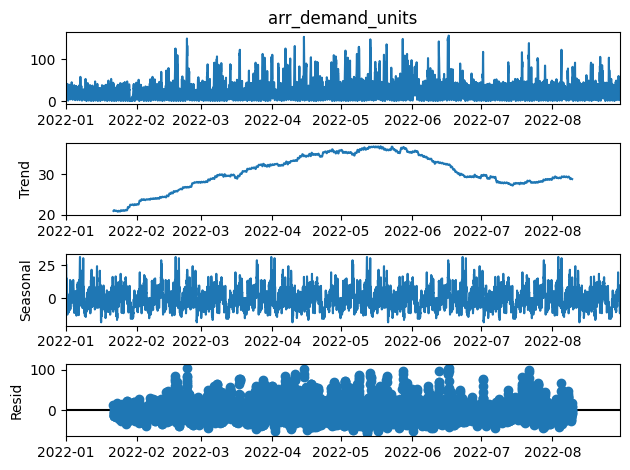

In [19]:
decomposition = seasonal_decompose(df['arr_demand_units'], model='additive', period=1000)
decomposition.plot()
plt.show()

If we see the trend, the peak demand can be noticed during the summer months, i.e. June/July. Later, we see the trend normalizing to pre-summer levels followed by a gradual increase during fall and a gradual decrease as winter approaches. 

The ADF test aims to reject the null hypothesis that the given time-series data is non-stationary. It calculates the p-value and compares it with a threshold value or significance level of 0.05. If the p-value is less than this level, then the data is stationary; else, the differencing order is incremented by one.

In [20]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(df['arr_demand_units'])
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -11.240343053626127 and p-value is 1.8136622189436214e-20


In [21]:
stat_test = adfuller(df['dep_demand_units'])
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -11.010327102433779 and p-value is 6.349290821739354e-20


In [22]:
stat_test = adfuller(df['total_demand_units'])
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -11.1306525525555 and p-value is 3.2886609832188996e-20


Since, the data is already stationary, we do not need to do differencing. 

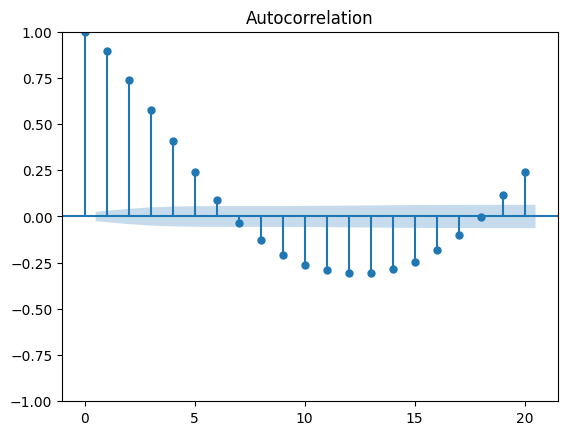

In [23]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df['arr_demand_units'], lags=20);

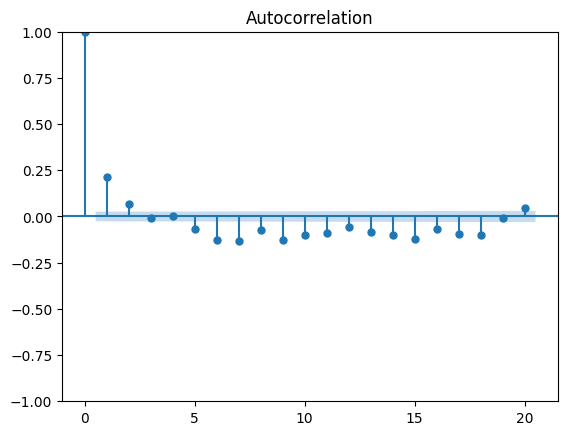

In [24]:
sm.graphics.tsa.plot_acf(df['arr_demand_units'].diff().dropna(), lags=20);

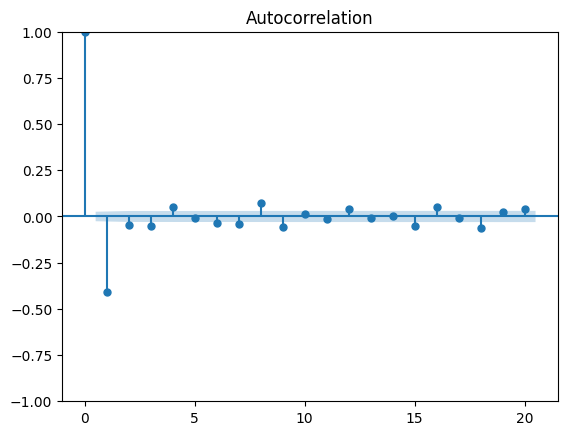

In [25]:
sm.graphics.tsa.plot_acf(df['arr_demand_units'].diff().diff().dropna(), lags=20);

From the autocorrelation graph, we can decide if more differencing is needed. If collectively the autocorrelations, or the data point of each lag (in the horizontal axis), are positive for several consecutive lags, more differencing might be needed. Conversely, if more data points are negative, the series is over-differenced.

In our case, no differencing is needed. 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


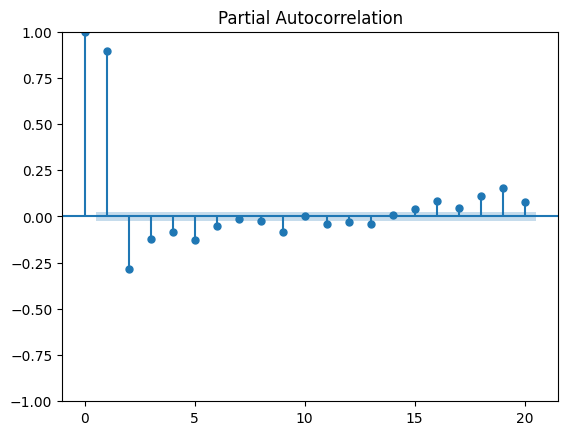

In [26]:
sm.graphics.tsa.plot_pacf(df['arr_demand_units'], lags=20);

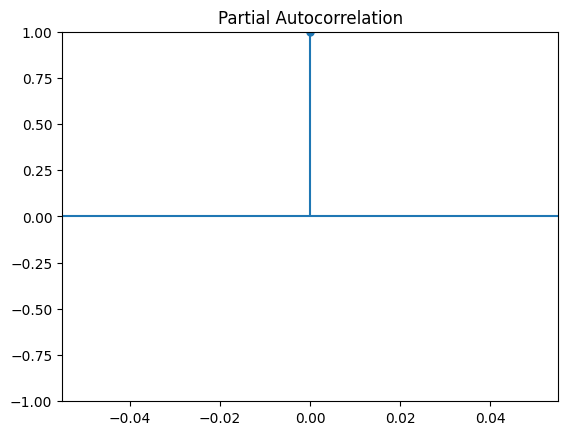

In [27]:
sm.graphics.tsa.plot_pacf(df['arr_demand_units'].diff(), lags=20);

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
arima_model = ARIMA(df['arr_demand_units'], order=(1,0,1))
model = arima_model.fit()
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       arr_demand_units   No. Observations:                 5796
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -21650.914
Date:                Sat, 19 Nov 2022   AIC                          43309.828
Time:                        18:29:29   BIC                          43336.488
Sample:                    01-01-2022   HQIC                         43319.102
                         - 08-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.5220      1.336     22.103      0.000      26.904      32.140
ar.L1          0.8484      0.006    141.643      0.000       0.837       0.860
ma.L1          0.2435      0.010     23.967      0.0

In [30]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(df['dep_demand_units'])
print('The test statistic is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic is -11.010327102433779 and p-value is 6.349290821739354e-20


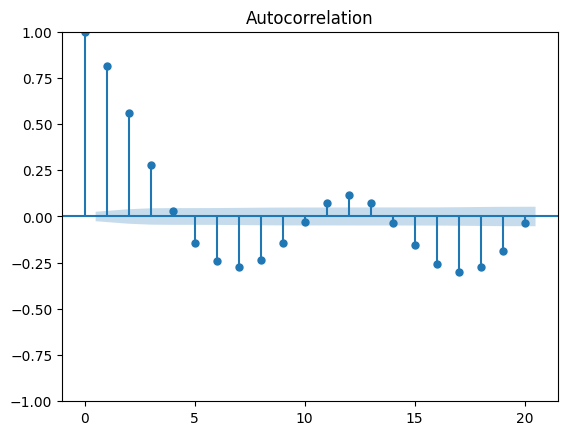

In [31]:
sm.graphics.tsa.plot_acf(df['dep_demand_units'], lags=20);

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


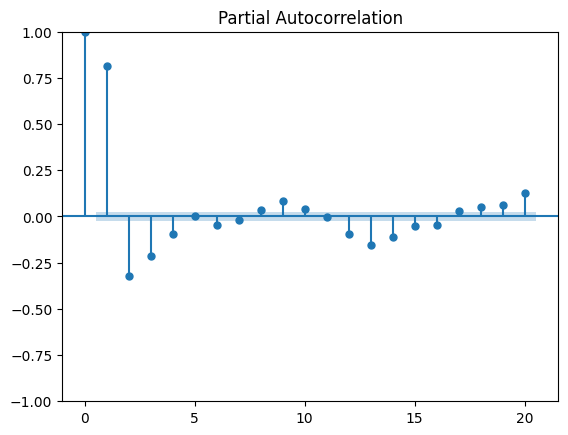

In [32]:
sm.graphics.tsa.plot_pacf(df['dep_demand_units'], lags=20);

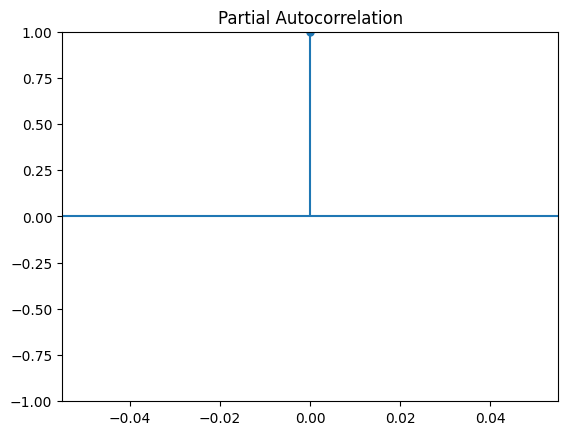

In [33]:
sm.graphics.tsa.plot_pacf(df['dep_demand_units'].diff(), lags=20);

In [34]:
arima_model = ARIMA(df['dep_demand_units'], order=(1,0,2))
model = arima_model.fit()
print(model.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       dep_demand_units   No. Observations:                 5796
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -23130.826
Date:                Sat, 19 Nov 2022   AIC                          46271.653
Time:                        18:29:31   BIC                          46304.977
Sample:                    01-01-2022   HQIC                         46283.245
                         - 08-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.3386      0.956     32.787      0.000      29.465      33.212
ar.L1          0.6572      0.012     52.700      0.000       0.633       0.682
ma.L1          0.3367      0.015     22.934      0.0

In [35]:
model = ARIMA(df.arr_demand_units[:4050], order=(1,0,2))
model_fit = model.fit()
print(model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:       arr_demand_units   No. Observations:                 4050
Model:                 ARIMA(1, 0, 2)   Log Likelihood              -15257.103
Date:                Sat, 19 Nov 2022   AIC                          30524.206
Time:                        18:29:31   BIC                          30555.739
Sample:                    01-01-2022   HQIC                         30535.377
                         - 06-18-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.1679      1.603     18.825      0.000      27.027      33.309
ar.L1          0.8207      0.009     90.308      0.000       0.803       0.839
ma.L1          0.2954      0.013     22.229      0.0

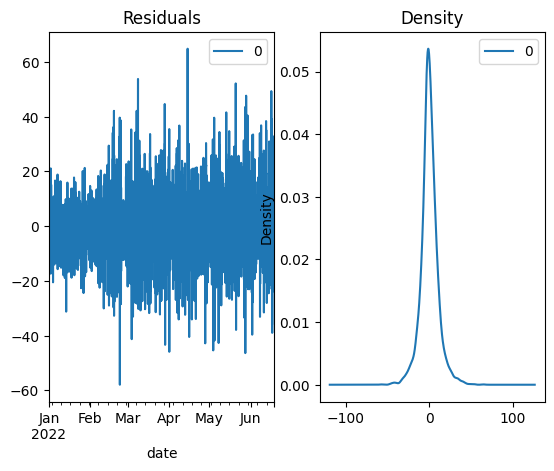

In [36]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [37]:
# Actual vs Fitted
from statsmodels.tsa.arima.model import ARIMAResults
#from statsmodels.tsa.arima.model.ARIMAResults import plot_predict
#from statsmodels.graphics.tsaplots import plot_predict
#model_fit.plot_predict(dynamic=False)
#plt.show()

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

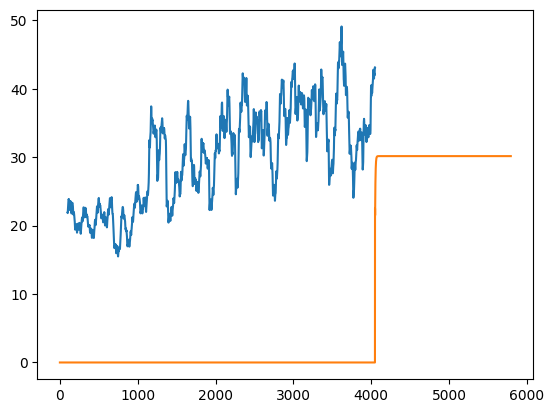

In [53]:
import copy

forecast_test = model_fit.forecast(len(df.arr_demand_units[4050:]))

copy = copy.deepcopy(df.arr_demand_units)
for i in range(4050):
    copy[i]=0
for i in range(4050, len(copy)):
    copy[i]=forecast_test[i-4050]


plt.plot(df.arr_demand_units[:4050].rolling(100).mean())
plt.plot(copy)
plt.show()

In [ ]:
df1

In [ ]:
forecast_test = model_fit.forecast(len(df.arr_demand_units[4050:]))

df = list(forecast_test)

print(result1)

In [ ]:
!pip install fbprophet

In [ ]:
!pip install prophet

In [38]:
df.reset_index(inplace=True)

In [39]:
df

,date,runway,weather,dep_eff_comp,arr_eff_comp,total_eff_comp,dep_facility_rep,arr_facility_rep,total_facility_rep,dep_demand_units,...,per_ontime_arp_dep,per_ontime_gate_arr,avg_gate_dep_delay,avg_taxi_out_time,avg_taxi_out_delay,avg_arp_dep_delay,avg_airborn_delay,avg_tax_in_dealy,avg_block_delay,avg_gate_arr_delay
0,2022-01-01 00:00:00+00:00,22L | 22R,IMC,5,10,15,0,0,0,5,...,0.00,66.67,110.50,12.00,0.00,109.50,3.22,4.22,2.89,14.22
1,2022-01-01 01:00:00+00:00,22L | 22R,IMC,2,3,5,0,0,0,2,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2022-01-01 02:00:00+00:00,22L | 22R,IMC,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2022-01-01 03:00:00+00:00,22L | 22R,IMC,1,1,2,0,0,0,1,...,0.00,60.00,0.00,0.00,0.00,0.00,1.00,0.98,3.60,43.80
4,2022-01-01 04:00:00+00:00,22L | 22R,IMC,0,2,2,0,0,0,0,...,100.00,66.67,0.25,14.25,2.15,1.00,15.83,2.20,18.67,38.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5791,2022-08-30 07:00:00+00:00,22L | 22R,IMC,33,24,57,33,24,57,34,...,50.00,70.73,16.43,25.18,13.00,27.66,4.22,10.97,6.73,13.98
5792,2022-08-30 08:00:00+00:00,22L | 22R,IMC,43,33,76,43,33,76,48,...,48.78,86.11,15.56,26.80,14.71,27.51,3.75,7.24,1.75,12.72
5793,2022-08-30 09:00:00+00:00,22L | 22R,VMC,39,27,66,39,27,66,43,...,60.00,75.00,8.40,24.80,12.58,18.10,3.25,3.78,2.58,10.03
5794,2022-08-30 10:00:00+00:00,22L | 22R,VMC,41,25,66,40,25,65,43,...,65.00,82.35,8.10,17.50,5.46,12.30,0.88,5.34,0.12,16.82


In [40]:
import datetime as dt
import cmdstanpy
cmdstanpy.install_cmdstan()
cmdstanpy.install_cmdstan(compiler=True) 

Installing CmdStan version: 2.30.1
Install directory: /Users/kratikaaggarwal/.cmdstan
CmdStan version 2.30.1 already installed
Installing CmdStan version: 2.30.1
Install directory: /Users/kratikaaggarwal/.cmdstan
CmdStan version 2.30.1 already installed


True

In [49]:
from prophet import Prophet
m = Prophet()
temp=pd.DataFrame({'ds': df['date'].dt.date,'y':df.arr_demand_units})
m.fit(temp)  # df is a pandas.DataFrame with 'y' and 'ds' columns
#future = m.make_future_dataframe(periods=365)
#m.predict(future)

18:31:41 - cmdstanpy - INFO - Chain [1] start processing
18:31:41 - cmdstanpy - INFO - Chain [1] done processing
18:31:41 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 6 Unknown error: -6
Optimization terminated abnormally. Falling back to Newton.
18:31:41 - cmdstanpy - INFO - Chain [1] start processing
18:31:41 - cmdstanpy - INFO - Chain [1] done processing
18:31:41 - cmdstanpy - ERROR - Chain [1] error: terminated by signal 6 Unknown error: -6


RuntimeError: Error during optimization! Command '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin random seed=28175 data file=/var/folders/j9/7zd3spx53398jkp125stdc7w0000gn/T/tmpvhxq5_z4/0zs74b7y.json init=/var/folders/j9/7zd3spx53398jkp125stdc7w0000gn/T/tmpvhxq5_z4/t3v54561.json output file=/var/folders/j9/7zd3spx53398jkp125stdc7w0000gn/T/tmpvhxq5_z4/prophet_modelx_867mqb/prophet_model-20221119183141.csv method=optimize algorithm=newton iter=10000' failed: console log output:

dyld[11947]: Library not loaded: '@rpath/libtbb.dylib'
  Referenced from: '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/prophet/stan_model/prophet_model.bin'
  Reason: tried: '/private/var/folders/j9/7zd3spx53398jkp125stdc7w0000gn/T/pip-install-6lqsg92y/prophet_db9d88bb43c043d7ac88e57d9ebca810/build/lib.macosx-10.9-universal2-cpython-310/prophet/stan_model/cmdstan-2.26.1/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/private/var/folders/j9/7zd3spx53398jkp125stdc7w0000gn/T/pip-install-6lqsg92y/prophet_db9d88bb43c043d7ac88e57d9ebca810/build/lib.macosx-10.9-universal2-cpython-310/prophet/stan_model/cmdstan-2.26.1/stan/lib/stan_math/lib/tbb/libtbb.dylib' (no such file), '/usr/local/lib/libtbb.dylib' (no such file), '/usr/lib/libtbb.dylib' (no such file)


In [52]:
from platform import python_version

print(python_version())

3.10.6


In [47]:
temp

,DS,Y
0,2022-01-01,11
1,2022-01-01,3
2,2022-01-01,0
3,2022-01-01,1
4,2022-01-01,2
...,...,...
5791,2022-08-30,24
5792,2022-08-30,33
5793,2022-08-30,27
5794,2022-08-30,25


In [ ]:
!pip install cmdstanpy